In [1]:
import pandas as pd
import glob
import os
import seaborn as sns

In [2]:
dirname = "../eval/LogicKor/results/peft:heegyu/0708-ko-prometheus-9b@epoch-1"
dfs = []
for file in glob.glob(os.path.join(dirname, "*.jsonl")):
    if "judge_gpt-4" in file:
        continue
    df = pd.read_json(file, lines=True)
    df["filename"] = os.path.basename(file).replace(".jsonl", "").replace("judge_", "")
    df["prometheus_score"] = df.judgement.apply(lambda x: int(x.split("[RESULT]", 1)[-1].strip()) if "[RESULT]" in x else -1)
    df["gpt4_score"] = df.query_single.apply(lambda x: x["judge_score"])
    dfs.append(df)

dfs = pd.concat(dfs)
dfs

,id,category,questions,outputs,references,query_single,query_multi,judge_name,judgement,filename,prometheus_score,gpt4_score
0,14,수학(Math),"[f(x) = 3x^3 + 2x^2 + 58을 미분하시오., 미분한 식을 한 번 더...","[네, 알겠습니다. 함수 f(x) = 3x^3 + 2x^2 + 58을 미분해 보도록...","[9x^2 + 4x, 18x + 4]","{'judge_message': '모델이 제공한 답변은 정확하고, 미분 과정을 설명...","{'judge_message': '모델이 제공한 답변은 정확하고, 미분 과정을 설명...",peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 함수 f(x) = 3x^3 + 2x^2 + 58을 미분하는 과정을 설명하...,claude-3-haiku-20240307,3,8.0
1,6,추론(Reasoning),[민수의 책상 위에는 연필 12자루가 있다. 지아가 연필 한 자루를 빌려 갔고 현수...,"[네, 알겠습니다. 민수의 책상 위에는 처음에 연필 12자루가 있었습니다. 그 후 ...","[5개, None]","{'judge_message': '모델이 제공한 답변은 정확하고, 질문에 요구된 계...",{'judge_message': '모델은 비슷한 문제를 출제하고 그에 대한 풀이 방...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 문제의 상황을 이해하고 연필의 수를 계산하는 과정을 명확하게 설명하고 있...,claude-3-haiku-20240307,5,10.0
2,7,추론(Reasoning),"[SNS의 등장 이후, SNS를 자아실현의 수단으로써 활용하며 젊은 세대에서 SNS...","[네, 그렇습니다. SNS의 등장 이후 젊은 세대를 중심으로 자아실현의 수단으로 S...","[None, None]",{'judge_message': '모델은 SNS가 자아실현의 수단으로 활용되는 현상...,"{'judge_message': '모델은 질문에 대한 답변을 잘 이해하고, 자본주의...",peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 SNS가 자아실현의 수단으로 활용되는 현상의 부가적 요인들을 명확히 제시...,claude-3-haiku-20240307,4,9.0
3,23,코딩(Coding),['XSS가 무엇이고 어떻게 악용될 수 있는지'를 설명하는 웹사이트의 HTML을 작...,"[네, 알겠습니다. XSS(Cross-Site Scripting)에 대해 자세히 설...","[None, None]","{'judge_message': '모델은 XSS에 대한 설명과 악용 사례, 예방 방...",{'judge_message': '모델은 마크다운 형식으로 XSS 방지 방법을 잘 ...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,"이 응답은 XSS(Cross-Site Scripting)에 대한 설명과 악용 방법,...",claude-3-haiku-20240307,5,9.0
4,4,추론(Reasoning),"[A, B, C 세 사람 중 한 명이 유리를 깨뜨렸습니다. 경찰이 찾아와 범인을 찾...","[네, 이 상황에서 범인은 B 씨라고 말씀드릴 수 있습니다.\n\nA 씨는 ""범인은...","[B, None]",{'judge_message': '모델이 제시한 답변은 정확하고 논리적입니다. 세 ...,{'judge_message': '모델이 제시한 문제는 논리적으로 모순되어 있어 올...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 답변은 주어진 정보를 바탕으로 범인을 식별하는 데 있어 논리적 추론을 적절히 적...,claude-3-haiku-20240307,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,19,글쓰기(Writing),"[새로 오픈한 카페를 홍보하려고 합니다. 홍보 대상, 홍보 전략을 선정하고 대상을 ...",[홍보 대상: 지역 커뮤니티 및 카페 애호가\n\n홍보 전략:\n1. **소셜 미디...,"[None, None]","{'judge_message': '모델은 홍보 대상과 전략을 명확하게 제시하고, 설...",{'judge_message': '모델은 홍보 대상인 '젊은 직장인'에 맞춰 적절한...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,"이 응답은 홍보 대상과 홍보 전략을 명확하게 정의하고, 대상을 설득할 수 있는 홍보...",nlpai-lab_KULLM3,5,9.0
38,4,추론(Reasoning),"[A, B, C 세 사람 중 한 명이 유리를 깨뜨렸습니다. 경찰이 찾아와 범인을 찾...",[세 사람의 진술을 바탕으로 범인을 찾아보겠습니다.\n\n1. A는 C가 범인이라고...,"[B, None]","{'judge_message': '모델이 제시한 추론 과정은 올바르지 않지만, 결론...",{'judge_message': '모델이 제시한 문제는 원래의 문제와 유사한 형식을...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 세 사람의 진술을 분석하고 범인을 찾기 위해 추론을 시도합니다. 그러나 ...,nlpai-lab_KULLM3,1,6.0
39,21,글쓰기(Writing),[자본론을 쓴 카를 마르크스가 오늘날의 비트코인 폭등과 같은 경제 현상을 어떻게 바...,"[카를 마르크스가 오늘날의 비트코인 폭등과 같은 경제 현상을 바라보았을 때, 그는 ...","[None, None]",{'judge_message': '모델은 마르크스의 관점에서 비트코인 폭등 현상을 ...,{'judge_message': '모델은 마르크스의 관점에서 현대 사회의 문제를 분...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 카를 마르크스가 오늘날의 비트코인 폭등과 같은 경제 현상을 어떻게 바라보...,nlpai-lab_KULLM3,4,8.0
40,22,코딩(Coding),"[시간 복잡도를 어떻게 구할 수 있는지 설명해주고, 많이 쓰이는 알고리즘 중에 최적...","[알고리즘의 시간 복잡도를 구하는 방법은 여러 가지가 있지만, 가장 일반적인 방법은...","[None, None]",{'judge_message': '모델이 시간 복잡도를 구하는 방법과 최적화를 통해...,{'judge_message': '모델이 시간 복잡도와 공간 복잡도의 차이를 명확하...,peft:heegyu/0708-ko-prometheus-9b@epoch-1,이 응답은 알고리즘의 시간 복잡도를 구하는 방법과 최적화를 통해 시간 복잡도를 줄인...,nlpai-lab_KULLM3,3,6.0


2


<Axes: xlabel='prometheus_score', ylabel='gpt4_score'>

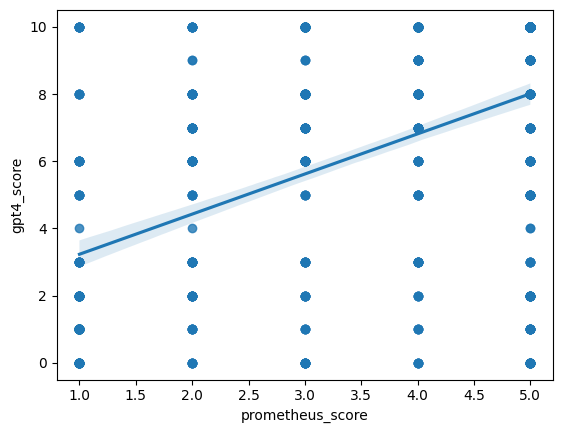

In [3]:
print(len(dfs[dfs.prometheus_score < 0]))
# dfs.plot.regplot(x="prometheus_score", y="gpt4_score")
df = dfs[dfs.prometheus_score >= 0]
sns.regplot(data=df, x="prometheus_score", y="gpt4_score")

/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missin

/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: Us

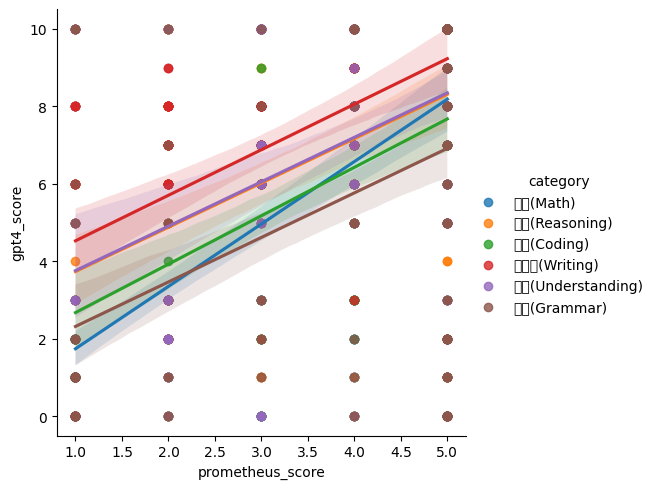

In [4]:
sns.lmplot(data=df, x="prometheus_score", y="gpt4_score", hue="category")

In [5]:
df[["prometheus_score", "gpt4_score"]].corr()

,prometheus_score,gpt4_score
prometheus_score,1.000000,0.491219
gpt4_score,0.491219,1.000000


In [6]:
df[["prometheus_score", "gpt4_score", "category"]].groupby("category").corr()

prometheus_score  gpt4_score
category                                                        
글쓰기(Writing)      prometheus_score          1.000000    0.529942
                  gpt4_score                0.529942    1.000000
문법(Grammar)       prometheus_score          1.000000    0.438851
                  gpt4_score                0.438851    1.000000
수학(Math)          prometheus_score          1.000000    0.695209
                  gpt4_score                0.695209    1.000000
이해(Understanding) prometheus_score          1.000000    0.458118
                  gpt4_score                0.458118    1.000000
추론(Reasoning)     prometheus_score          1.000000    0.491360
                  gpt4_score                0.491360    1.000000
코딩(Coding)        prometheus_score          1.000000    0.427161
                  gpt4_score                0.427161    1.000000